## Set Up

In [10]:
%matplotlib notebook
#for animating 3d graph

import pandas as pd
import matplotlib.pyplot as plt
import math
import itertools
from itertools import combinations

starType_dict = {0: 'Brown Dwarf', 1:'Red Drawf',2:'White Drawf', 3:'Main Sequence ', 4:'Supergiant', 5:'Hypergiant'}

df = pd.read_csv('6 class csv.csv')


### 1. General properties of the dataset

In [4]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


### 2.What common patterns do you notice between any two properties? 

Here's a list of all the correlations (Note: my correlation threshold is 0.5)

Strong Negative correlations:

| Absolute magnitude(Mv) | Star type              |
|------------------------|------------------------|
| Temperature (K)        | Star color             |
| Luminosity(L/Lo)       | Absolute magnitude(Mv) |
| Radius(R/Ro)           | Absolute magnitude(Mv) |



Strong Positive correlations:

| Luminosity(L/Lo) | Radius(R/Ro) |
|------------------|--------------|
| Radius(R/Ro)     | Star type    |
| Luminosity(L/Lo) | Star type    |


If we treat the columns as their index number, then correlation doesn't matter with directions, so we want combinations of indexes, not permutation. We need to generate every combinations of columns names without repeats or columns.

Another obstacle is that 2 of the categories, is string and not a number. So to fix that, we assign each option a number. 


In [4]:
dfCorr=df
dfCorr['Star color']=dfCorr['Star color'].astype('category').cat.codes
dfCorr['Spectral Class']=dfCorr['Spectral Class'].astype('category').cat.codes

dfCorr=dfCorr.corr(numeric_only=False)

corrList = pd.DataFrame(columns=['Row', 'Column', 'Correlation Value'])

size=0
for x in range(len(dfCorr.columns)):
    corrList.loc[size,'Row']=dfCorr.axes[1][x]
    for y in range(len(dfCorr.columns)):
        corrList.loc[size,'Row']=dfCorr.axes[1][x]
        corrList.loc[size,'Column']=dfCorr.axes[0][y]
        corrList.loc[size,'Correlation Value']=dfCorr.iloc[x][y]
        size=size+1   

###########################################################3
threshold = 0.5
corrListStrong = corrList[(corrList['Correlation Value'] >= threshold) | (corrList['Correlation Value'] <= -threshold) ]

# remove Correlation Value of 1.0 because those are the column of the same thing
corrListStrong = corrListStrong.loc[corrList['Correlation Value'] != 1]


#Drop duplicate rows in Pandas based on column value
#if they have the same corr value they're the same combination of row and column
corrListStrong = corrListStrong.drop_duplicates(subset='Correlation Value', keep="first")
corrListStrong=corrListStrong.sort_values('Correlation Value')
corrListStrong['Correlation Type']=corrListStrong['Correlation Value'].apply(lambda x: 'Strong Positive' if x>0 else 'Strong Negative')

corrListStrong

,Row,Column,Correlation Value,Correlation Type
25,Absolute magnitude(Mv),Star type,-0.955276,Strong Negative
5,Temperature (K),Star color,-0.697438,Strong Negative
10,Luminosity(L/Lo),Absolute magnitude(Mv),-0.692619,Strong Negative
17,Radius(R/Ro),Absolute magnitude(Mv),-0.608728,Strong Negative
9,Luminosity(L/Lo),Radius(R/Ro),0.526516,Strong Positive
18,Radius(R/Ro),Star type,0.660975,Strong Positive
11,Luminosity(L/Lo),Star type,0.676845,Strong Positive


### 3 Pair plot for each numerical category with regression (with seaborn) / Regression in bulk

Amongst the regression plots, the ones that are strongests are Temperature/Star Type, Luminosity/Star Type, Radius/Star Type, Absolute Magnitude/Type. Just like what we saw from 2. and 3.

<IPython.core.display.Javascript object>


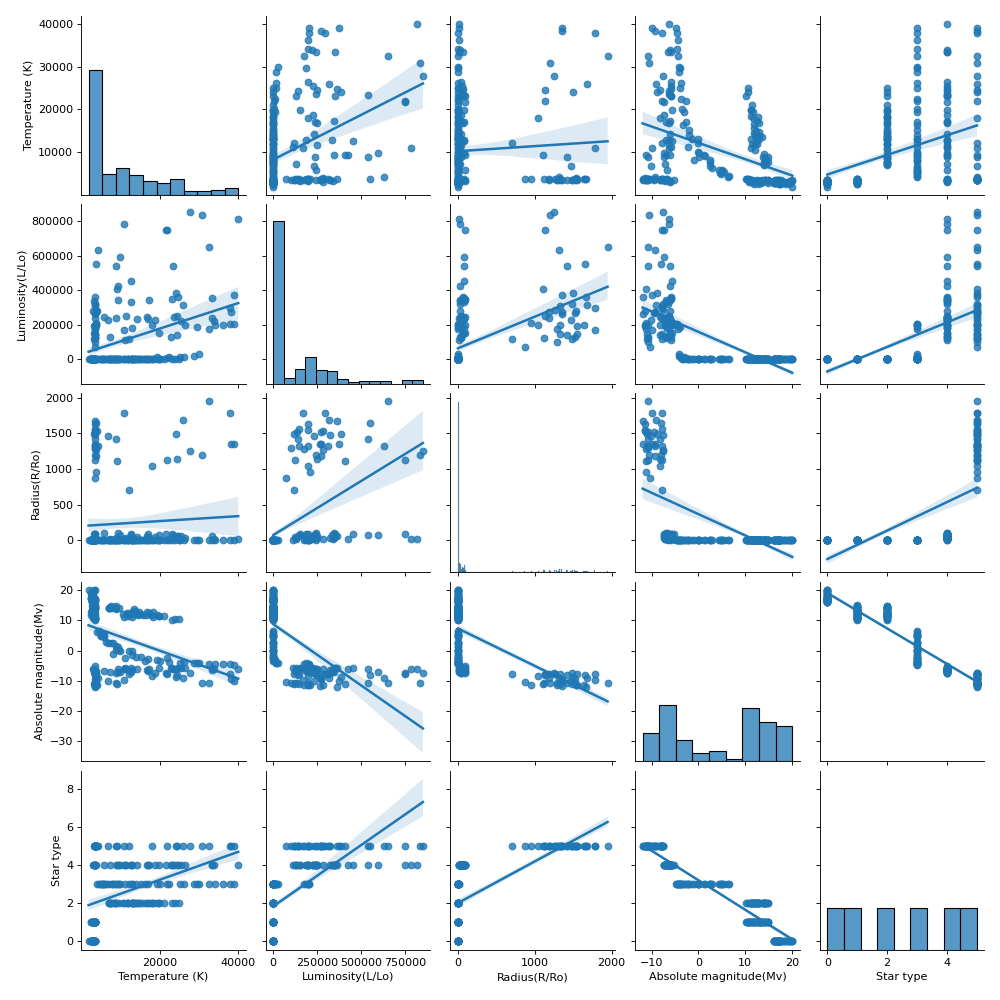

In [32]:
import seaborn as sns
sns.pairplot(df,kind='reg')

### 4.  Hertzsprung-Russell Diagrams

size(radius) scaling used is log scaling, because the difference in magnitude of the biggest and smallest radius is 2E5

color attribute of .scatter is also used with size attribute to clearly show the size of each dot/star

<IPython.core.display.Javascript object>


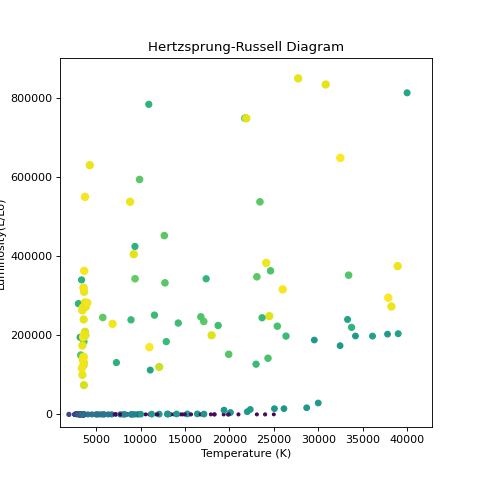

In [30]:
# x-axis is temperature
# y-axis is Luminosity
# dot size is 
DPI = 100
width, height = 600, 600
fig, ax = plt.subplots(figsize=(width/DPI, height/DPI))
LuminosityList=df['Luminosity(L/Lo)']
TemperatureList=df['Temperature (K)']
RadiusList=df['Radius(R/Ro)'].apply(lambda x: math.log(x/0.001,1.4))
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity(L/Lo)')
plt.title('Hertzsprung-Russell Diagram')
#colorList
graph = ax.scatter(TemperatureList, LuminosityList, s=RadiusList, c=RadiusList)

Since the graphs already use 3 attributes in plotting (L,K,R), I will use the other attribute (Mv,Star type,Star color,Spectral Class) to filter

### 3D Hertzsprung-Russell Diagram with Absolute magnitude(Mv) as a 3rd axis

I picked Mv as a 3rd axis because it is numerical

<IPython.core.display.Javascript object>


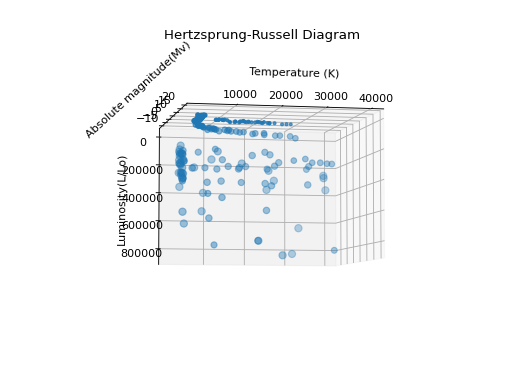

In [45]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits import mplot3d #for 3D plot
from mpl_toolkits.mplot3d import Axes3D #for z-axis


# x-axis is temperature
# y-axis is Luminosity
# dot size is 
DPI = 100
width, height = 600, 800
fig = plt.figure()
ax = plt.axes(projection='3d')

xdata=df['Temperature (K)']
ydata=df['Absolute magnitude(Mv)']
zdata=df['Luminosity(L/Lo)']
sizedata=df['Radius(R/Ro)'].apply(lambda x: math.log(x/0.001,1.4))

plt.xlabel('Temperature (K)')
plt.ylabel('Absolute magnitude(Mv)')
ax.set(zlabel='Luminosity(L/Lo)')
plt.title('Hertzsprung-Russell Diagram')

ax.scatter3D(xdata, ydata, zdata,s=sizedata )

ax.view_init(0, 0)
plt.draw()
plt.pause(.001)

#### 4.a - Hertzsprung-Russell Diagram with Star Type 5

Wide range of temperature and luminosity, but clumping of stars occur at 100,000 to 400,000 degree Kelvin and at or below 5000 solar luminosity.

<IPython.core.display.Javascript object>


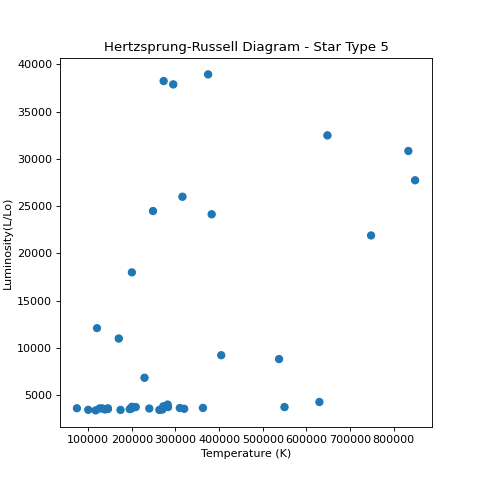

In [22]:
starTp=5

src='Star type'
LuminosityList = (df.loc[df[src]==starTp])['Luminosity(L/Lo)']
TemperatureList = (df.loc[df[src]==starTp])['Temperature (K)']
RadiusList = (df.loc[df[src]==starTp])['Radius(R/Ro)']
DPI = 100
width, height = 600, 600
fig, ax = plt.subplots(figsize=(width/DPI, height/DPI))
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity(L/Lo)')
plt.title('Hertzsprung-Russell Diagram'+' - Star Type '+str(starTp))

ax.scatter(LuminosityList, TemperatureList, s=RadiusList.apply(lambda x: math.log(x/0.001,1.4)) )

#### 4.b - Hertzsprung-Russell Diagram with Spectral Class M

Some stars that belong to Spectral class M have temperature closely around to 0 degree Kelvin and is above 2500 solar luminisity, there is aso a wide spread of temperature range.

<IPython.core.display.Javascript object>


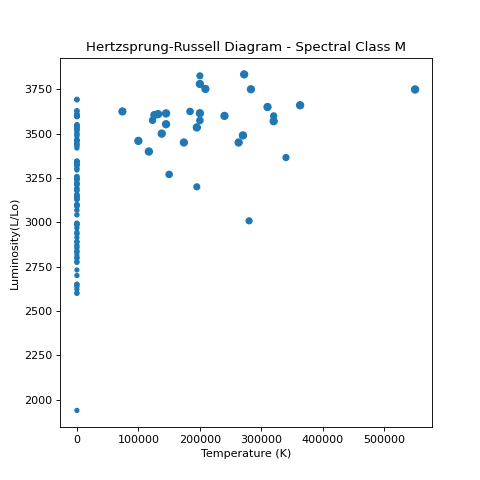

In [20]:
spectralCl='M'

src='Spectral Class'
LuminosityList = (df.loc[df[src]==spectralCl])['Luminosity(L/Lo)']
TemperatureList = (df.loc[df[src]==spectralCl])['Temperature (K)']
RadiusList = (df.loc[df[src]==spectralCl])['Radius(R/Ro)']
DPI = 100
width, height = 600, 600
fig, ax = plt.subplots(figsize=(width/DPI, height/DPI))
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity(L/Lo)')
plt.title('Hertzsprung-Russell Diagram'+' - Spectral Class '+str(spectralCl))

ax.scatter(LuminosityList, TemperatureList, s=RadiusList.apply(lambda x: math.log(x/0.001,1.4)) )

#### 4.c - Hertzsprung-Russell Diagram with Star color Red

Most stars that are red have temperature close to 0 degree Kelvin, but that isn't a strong statement, as there's a not-insignificant amount of stars that deviate from the 0 degree Kelvin range.

All of them, with one exception, is below or at 4000 solar luminosity.

<IPython.core.display.Javascript object>


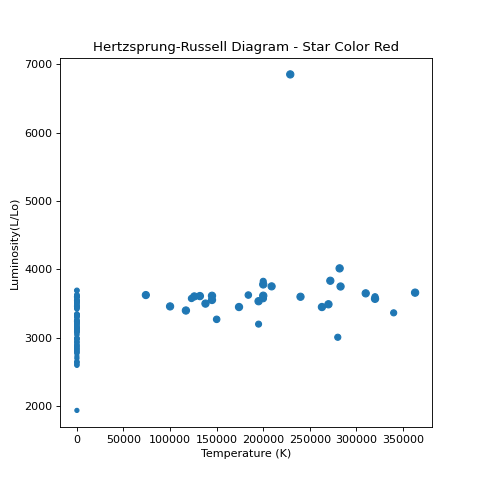

In [21]:
starClr='Red'

src='Star color'
LuminosityList = (df.loc[df[src]==starClr])['Luminosity(L/Lo)']
TemperatureList = (df.loc[df[src]==starClr])['Temperature (K)']
RadiusList = (df.loc[df[src]==starClr])['Radius(R/Ro)']
DPI = 100
width, height = 600, 600
fig, ax = plt.subplots(figsize=(width/DPI, height/DPI))
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity(L/Lo)')
plt.title('Hertzsprung-Russell Diagram'+' - Star Color '+str(starClr))

ax.scatter(LuminosityList, TemperatureList, s=RadiusList.apply(lambda x: math.log(x/0.001,1.4)) )

#### 4.d - Hertzsprung-Russell Diagram with Absolute magnitude(Mv) greater than 0

Conclusion we can draw is that most of the stars with Mv greater than 0 have a range of Luminosity, but are mostly close to 0 degree Kelvin with a few outliers

<IPython.core.display.Javascript object>


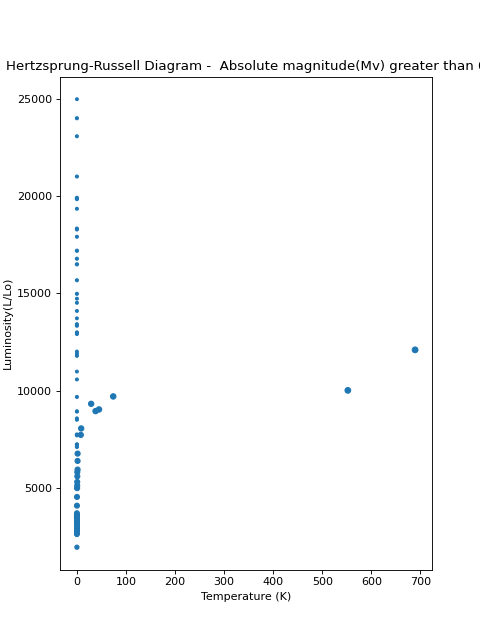

In [7]:

LuminosityList = (df.loc[df['Absolute magnitude(Mv)'] >0])['Luminosity(L/Lo)']
TemperatureList = (df.loc[df['Absolute magnitude(Mv)']>0])['Temperature (K)']
RadiusList = (df.loc[df['Absolute magnitude(Mv)']>0])['Radius(R/Ro)']
DPI = 100
width, height = 600, 800
fig, ax = plt.subplots(figsize=(width/DPI, height/DPI))
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity(L/Lo)')
plt.title('Hertzsprung-Russell Diagram'+' -  Absolute magnitude(Mv) greater than 0')

ax.scatter(LuminosityList, TemperatureList, s=RadiusList.apply(lambda x: math.log(x/0.001,1.4)) )

### 5. What properties are the most influential in classifying a star's type?

Most influencial is Absolute magnitude(Mv) with a negative correlation, followed by Luminosity(L/Lo) positive correlation, then Radius(R/Ro) positive correlation

(Note: my correlation threshold is 0.5)

| Row                    | Column    | Correlation Value | Correlation Type |
|------------------------|-----------|-------------------|------------------|
| Luminosity(L/Lo)       | Star type | 0.676845          | Strong           |
| Radius(R/Ro)           | Star type | 0.660975          | Strong           |
| Absolute magnitude(Mv) | Star type | -0.955276         | Strong           |

In [ ]:
dfCorr=df
dfCorr['Star color']=dfCorr['Star color'].astype('category').cat.codes
dfCorr['Spectral Class']=dfCorr['Spectral Class'].astype('category').cat.codes

dfCorr=dfCorr.corr(numeric_only=False)

corrList = pd.DataFrame(columns=['Row', 'Column', 'Correlation Value'])

size=0
for x in range(len(dfCorr.columns)):
    corrList.loc[size,'Row']=dfCorr.axes[1][x]
    for y in range(len(dfCorr.columns)):
        corrList.loc[size,'Row']=dfCorr.axes[1][x]
        corrList.loc[size,'Column']=dfCorr.axes[0][y]
        corrList.loc[size,'Correlation Value']=dfCorr.iloc[x][y]
        size=size+1   
        
corrList = corrList.loc[corrList['Correlation Value'] != 1]
corrList = corrList.drop_duplicates(subset='Correlation Value', keep="first")

corrList

#############################################################################
threshold = 0.5

starTypeCorrelations = corrList[corrList.loc[:,'Row']=='Star type']
starTypeCorrelations=pd.concat([starTypeCorrelations, corrList[corrList.loc[:,'Column']=='Star type']])
starTypeCorrelations.sort_values('Correlation Value', ascending=False)
starTypeCorrelations['Correlation Type']=starTypeCorrelations['Correlation Value'].apply(lambda x: 'Strong' if abs(x)>threshold else 'Weak')
starTypeCorrelations.loc[starTypeCorrelations['Correlation Type'] == 'Strong']

### What is the most common star type in the data?


All, because each type have 40 stars

In [31]:
numStar=240
starType_list_df = df['Star type']
StarType_counts = {}

for x in range(numStar):
    if starType_list_df[x] not in StarType_counts:
        StarType_counts[starType_list_df[x]] = 1
    else:
        StarType_counts[starType_list_df[x]] += 1
            
year_df = pd.DataFrame(StarType_counts.items(), columns=['Star Type', 'Amount of Stars']).sort_values('Star Type', ascending=False).reset_index(drop=True)
year_df

#print('The most common star type is ' + starType_dict[year_df.loc[0, 'Star Type']]+ ', with amount of '+str(year_df.loc[0, 'Amount of Stars']))

,Star Type,Amount of Stars
0,5,40
1,4,40
2,3,40
3,2,40
4,1,40
5,0,40
